In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)



%matplotlib inline

df=pd.read_csv('../data/mergedData.csv')
df['Test_Type']=df['Test_Type'].str.lower()
df['Signal_Strength'] =df['Signal_Strength'].abs()
df['Signal_Strength'] = df['Signal_Strength']*(-1)
df['Month&Year']=pd.to_datetime(df['Month&Year'])
df=df.drop(columns=['Month&Year'])
df=df.sample(frac=0.0002, random_state=1011)
df=MultiColumnLabelEncoder(columns =['Technology','Test_Type','LSA']).fit_transform(df)


In [18]:
df

Operator  Technology  Test_Type  Data_Speed  Signal_Strength  LSA
14042075       JIO           2          1    0.027433            -61.0   13
4088278     AIRTEL           2          1    0.002271            -99.0   22
5977807        JIO           2          0    0.020294            -12.0    6
6360702        JIO           2          1    0.059809            -34.0    2
8579457        JIO           2          0    0.006201           -102.0    5
...            ...         ...        ...         ...              ...  ...
12565517       JIO           2          0    0.059441            -93.0    0
4284103        JIO           2          0    0.133383            -88.0    9
8500676        JIO           2          0    0.002675           -102.0    4
3841377   VODAFONE           2          0    0.003725           -110.0    5
8389487     AIRTEL           2          0    0.069113           -107.0   20

[3614 rows x 6 columns]

In [3]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

random_seed=1011
# X, y = load training data
X=df.drop(columns=['Operator'])
y=df.Operator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=5,random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5712309820193637


No handles with labels found to put in legend.


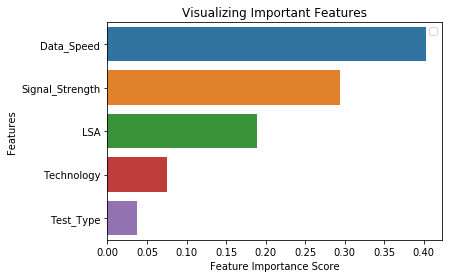

'\nTherefore, the feature Test_type is least imporant in the decision tree as it has more uniformity in its distribution, which leads to redundant results\n'

In [4]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()
#the plot shows the importanat features
'''
Therefore, the feature Test_type is least imporant in the decision tree as it has more uniformity in its distribution, which leads to redundant results
'''

In [5]:
X=df.drop(columns=['Operator','Test_Type'])
y=df.Operator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
random_seed=1011
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=5,random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Thus, we can see that the accuracy has improved but not significantly

Accuracy: 0.5878284923928078


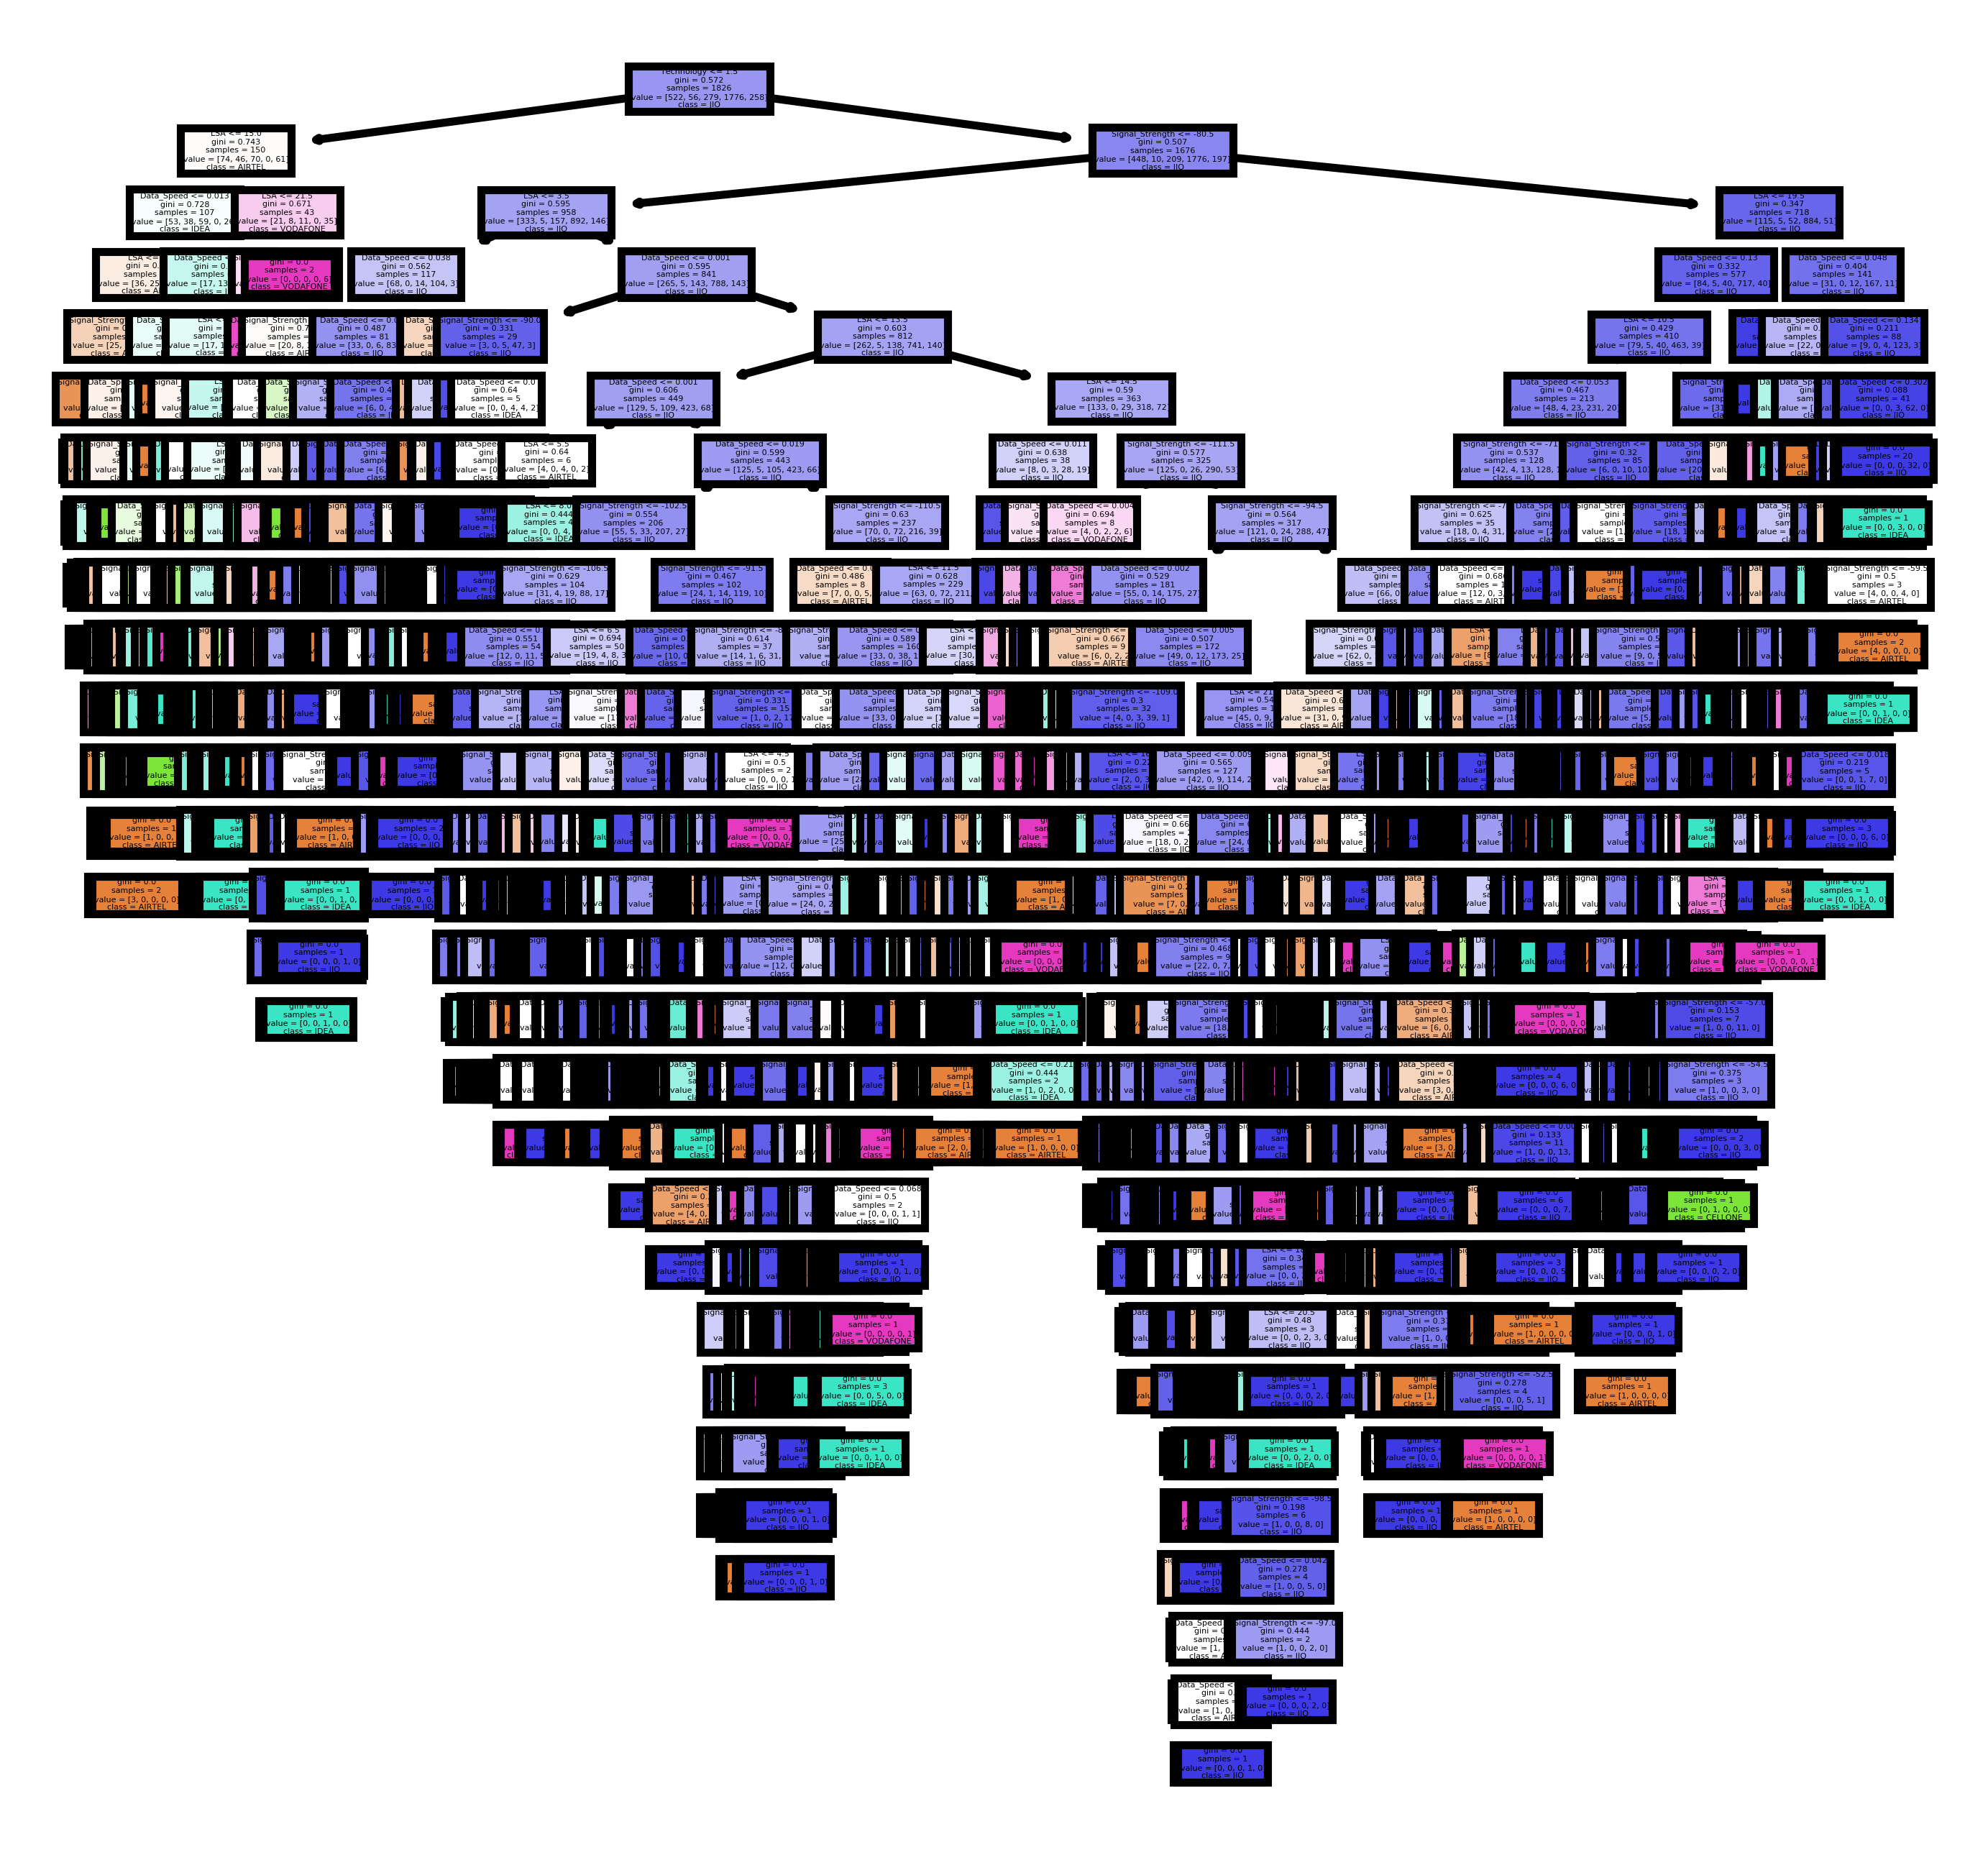

In [6]:
from sklearn.tree import export_graphviz
import pydotplus
import os
from sklearn import tree

fn=X.columns
cn=['AIRTEL','CELLONE','IDEA','JIO','VODAFONE']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[4], 
               feature_names = fn, 
               class_names=cn,
               filled = True)
fig.savefig('../plots/clf-individualtree.png')



In [ ]:
import seaborn as sns
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot = True, fmt='.1g',vmin=-1, vmax=1, center= 0)
plt.savefig('../plots/correlation-plot.png')

In [16]:
len(clf.estimators_)


5